<a href="https://colab.research.google.com/github/MarvinLok/Algo-Trading/blob/main/candlestick_eveningstar_morningstar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas_datareader as pdr
!pip install mplfinance
import mplfinance as mpf
SPY = pdr.get_data_tiingo('SPY', api_key='9350e9a3d1f2f56e709a7a9ba1e0fadcba7271ce ')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [ ]:
SPY.head()

close    high     low    open    volume  \
symbol date                                                                  
SPY    2018-01-08 00:00:00+00:00  273.92  274.10  272.98  273.31  57319192   
       2018-01-09 00:00:00+00:00  274.54  275.25  274.08  274.40  57253957   
       2018-01-10 00:00:00+00:00  274.12  274.42  272.92  273.68  69574318   
       2018-01-11 00:00:00+00:00  276.12  276.12  274.56  274.75  62361455   
       2018-01-12 00:00:00+00:00  277.92  278.11  276.08  276.42  90816076   

                                    adjClose     adjHigh      adjLow  \
symbol date                                                            
SPY    2018-01-08 00:00:00+00:00  251.337841  251.503001  250.475335   
       2018-01-09 00:00:00+00:00  251.906728  252.558195  251.484650   
       2018-01-10 00:00:00+00:00  251.521353  251.796620  250.420281   
       2018-01-11 00:00:00+00:00  253.356471  253.356471  251.925079   
       2018-01-12 00:00:00+00:00  255.008078  255.182414  253.319769   

                                     adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                    
SPY    2018-01-08 00:00:00+00:00  250.778130   57319192      0.0          1.0  
       2018-01-09 00:00:00+00:00  251.778269   57253957      0.0          1.0  
       2018-01-10 00:00:00+00:00  251.117627   69574318      0.0          1.0  
       2018-01-11 00:00:00+00:00  252.099415   62361455      0.0          1.0  
       2018-01-12 00:00:00+00:00  253.631739   90816076      0.0          1.0

In [ ]:
import mplfinance as mpf
#SPY.index = SPY['date']
SPY_adj = SPY.iloc[:,7:11]
SPY_adj.columns = ['Close','High','Low','Open']

# 取2019年的數據
SPY_adj_2020 = SPY_adj['2020']

# 開盤價 & 收盤價
SPY_adj_2020_Open = SPY_adj_2020.Open
SPY_adj_2020_Close = SPY_adj_2020.Close

# 當日漲跌點數
SPY_DailyChg_2020 = SPY_adj_2020_Close - SPY_adj_2020_Open

# 取得每日的振幅
SPY_Abs_DailyChg_2020 = abs(SPY_DailyChg_2020)

SPY_Abs_DailyChg_2020.describe()

In [ ]:
# 抓取 第1根大振幅陽線、第2根小振幅陽線或陰線、第3根陰線且振幅大於第1根的1/2
evening_condition_1 = [0,0]
for i in range(2, len(SPY_DailyChg_2020)):
    if ( SPY_DailyChg_2020[i-2] > 2.531 ) & ( abs(SPY_DailyChg_2020[i-1]) < 0.877393 ) & ( SPY_DailyChg_2020[i] < -1.2655 ):
        evening_condition_1.append(1)
    else:
        evening_condition_1.append(0)

# condition 1 符合的次數
evening_condition_1.count(1)

# 第2根的開盤與收盤價 均大於 第1根的收盤與第3根的開盤
evening_condition_2 = [0,0]
for i in range(2, len(SPY_adj_2020_Open)):
    if ( SPY_adj_2020_Open[i-1] > SPY_adj_2020_Close[i-2] ) & ( SPY_adj_2020_Open[i-1] > SPY_adj_2020_Open[i] ) & ( SPY_adj_2020_Close[i-1] > SPY_adj_2020_Close[i-2] ) & ( SPY_adj_2020_Close[i-1] > SPY_adj_2020_Open[i] ):
        evening_condition_2.append(1)
    else:
        evening_condition_2.append(0)
evening_condition_2.count(1)

# Evening Star Signal
evening_star_signal = []
for i in range(len(evening_condition_1)):
    if ( evening_condition_1[i] == 1 ) & ( evening_condition_2[i] == 1 ):
        evening_star_signal.append(1)
    else:
        evening_star_signal.append(0)

# Find Evening Star date
for i in range(len(evening_star_signal)):
    if evening_star_signal[i] == 1:
        print(SPY_adj_2020.index[i])

2020-04-13 00:00:00+00:00


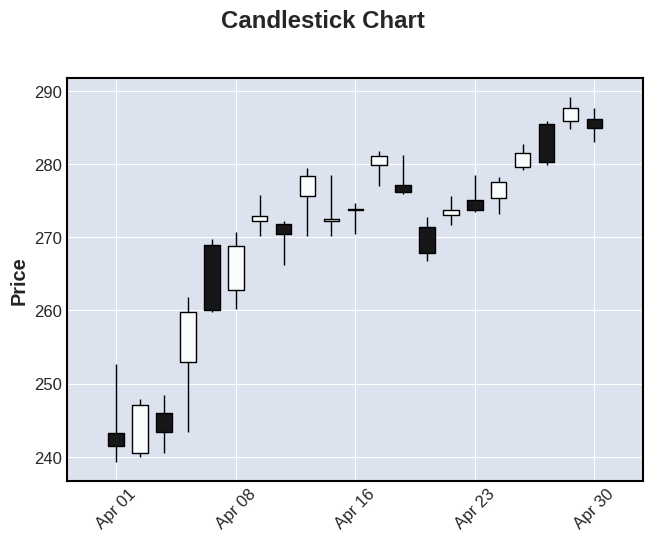

In [ ]:
SPY_adj_April = SPY_adj_2020['2020-04']
SPY_adj_April
mpf.plot(SPY_adj_April, type='candle',title='Candlestick Chart',ylabel='Price',)

In [ ]:
# 抓取 第1根大振幅陰線、第2根小振幅陽線或陰線、第3根陽線且振幅大於第1根的1/2
morning_condition_1 = [0,0]
for i in range(2, len(SPY_DailyChg_2020)):
    if ( SPY_DailyChg_2020[i-2] < -2.531 ) & ( abs(SPY_DailyChg_2020[i-1]) < 0.877393 ) & ( SPY_DailyChg_2020[i] > 1.2655 ):
        morning_condition_1.append(1)
    else:
        morning_condition_1.append(0)

# condition 1 符合的次數
morning_condition_1.count(1)

# 第2根的開盤與收盤價 均少於 第1根的開盤與第3根的收盤
morning_condition_2 = [0,0]
for i in range(2, len(SPY_adj_2020_Open)):
    if ( SPY_adj_2020_Open[i-1] < SPY_adj_2020_Close[i-2] ) & ( SPY_adj_2020_Open[i-1] < SPY_adj_2020_Open[i] ) & ( SPY_adj_2020_Close[i-1] < SPY_adj_2020_Close[i-2] ) & ( SPY_adj_2020_Close[i-1] < SPY_adj_2020_Open[i] ):
        morning_condition_2.append(1)
    else:
        morning_condition_2.append(0)
morning_condition_2.count(1)

# Morning Star Signal
morning_star_signal = []
for i in range(len(morning_condition_1)):
    if ( morning_condition_1[i] == 1 ) & ( morning_condition_2[i] == 1 ):
        morning_star_signal.append(1)
    else:
        morning_star_signal.append(0)

# Find Morning Star date
for i in range(len(morning_star_signal)):
    if morning_star_signal[i] == 1:
        print(SPY_adj_2020.index[i])

2020-01-28 00:00:00+00:00
2020-07-27 00:00:00+00:00


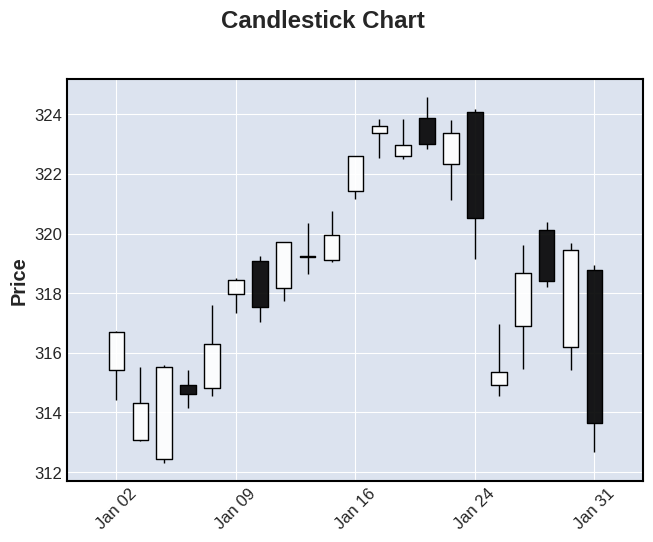

In [ ]:
SPY_adj_Jan = SPY_adj_2020['2020-01']
SPY_adj_Jan
mpf.plot(SPY_adj_Jan, type='candle',title='Candlestick Chart',ylabel='Price',)

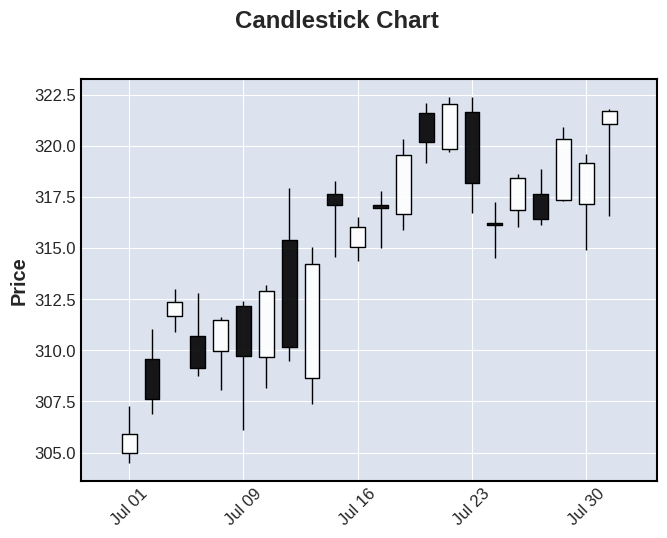

In [ ]:
SPY_adj_Jul = SPY_adj_2020['2020-07']
SPY_adj_Jul
mpf.plot(SPY_adj_Jul, type='candle',title='Candlestick Chart',ylabel='Price',)